<a href="https://colab.research.google.com/github/Cksdud123/colab/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
import cv2
import numpy as np
from PIL import Image
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
train_dir = glob.glob('/content/drive/MyDrive/Colab Notebooks/mvtec_anomaly_detection/bottle/train/good/*')
test_dir = glob.glob('/content/drive/MyDrive/Colab Notebooks/mvtec_anomaly_detection/bottle/test/broken_large/*')

In [82]:
train_images = []
train_labels = []
test_images = []
test_labels = []
target_size = (100, 100)

In [83]:
# 데이터셋 내의 모든 이미지 파일에 대해 resize 작업과 픽셀 값 정규화 작업
# 이미지 로드 및 리사이징
for img_path in train_dir:
    img = Image.open(img_path)
    rgb_img = img.convert('RGB')
    resized_img = rgb_img.resize(target_size)
    img_array = np.array(resized_img)
    min_value = img_array.min()
    max_value = img_array.max()
    normalized_img_array = (img_array - min_value) / (max_value - min_value)
    train_images.append(normalized_img_array)
    train_labels.append(0)

In [84]:
for img_path in test_dir:
    img = Image.open(img_path)
    rgb_img = img.convert('RGB')
    resized_img = rgb_img.resize(target_size)
    min_value = img_array.min()
    max_value = img_array.max()
    normalized_img_array = (img_array - min_value) / (max_value - min_value)
    test_images.append(normalized_img_array)
    test_labels.append(1)

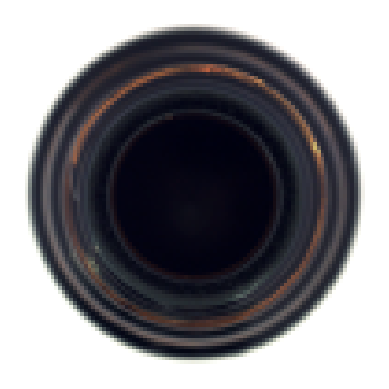

첫 번째 이미지의 크기: (100, 100, 3)


In [85]:
# 첫 번째 이미지 시각화 및 resizing이 제대로 되었는지 확인
plt.imshow(train_images[0])
plt.axis('off')
plt.show()

first_image_size = train_images[0].shape
print("첫 번째 이미지의 크기:", first_image_size)

In [86]:
# 정상과 비정상 데이터를 합친 전체 데이터셋
all_images = train_images + test_images
all_labels = train_labels + test_labels

# 데이터를 훈련 세트와 검증 세트로 분리
train_images, val_images, train_labels, val_labels = train_test_split(all_images,
                                                                      all_labels,
                                                                      test_size=0.2,
                                                                      random_state=42)

In [103]:
# 합성곱 신경망 모델
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(100,100,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

In [104]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 40000)             0         
                                                                 
 dense_15 (Dense)            (None, 100)              

In [110]:
# numpy배열로 변환
train_images = np.array(train_images)
val_images = np.array(val_images)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [113]:
# 모델 훈련하기
epochs = 30
model.fit(train_images, train_labels, epochs=epochs, validation_split=0.2)

Epoch 1/30
5/5 [==============================] - 0s 40ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 0s 29ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 0s 29ms/step - loss: 0.0305 - accuracy: 0.9932 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 0s 25ms/step - loss: 0.0323 - accuracy: 0.9863 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 0s 28ms/step - loss: 0.0291 - accuracy: 0.9932 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 0s 28ms/step - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 0s 28ms/step - loss: 0.0242 - accuracy: 0.9863 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 8/30
5/5 [===========

In [112]:
# 테스트 데이터를 사용하여 모델 평가
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 133ms/step - loss: 0.0861 - accuracy: 1.0000
Test Loss: 0.08606375753879547
Test Accuracy: 1.0
